In [120]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sbn


In [121]:
dataframe=pd.read_csv('alzheimer.csv')

In [122]:
dataframe

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [123]:
dataframe.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

<Axes: xlabel='Group', ylabel='count'>

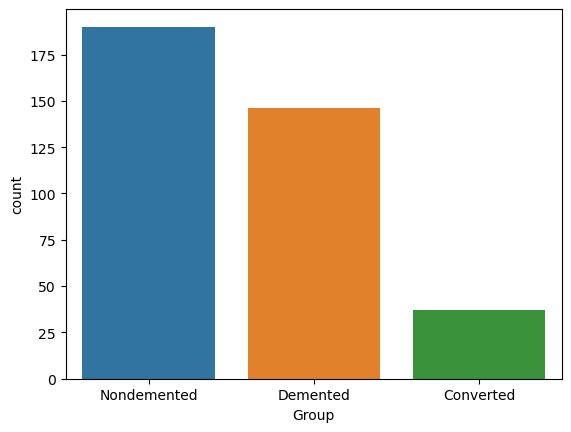

In [124]:
sbn.countplot(x=dataframe["Group"])

In [125]:
dataframe['SES'].fillna(dataframe['SES'].mean(), inplace=True)
dataframe['MMSE'].fillna(dataframe['MMSE'].mean(), inplace=True)

In [126]:
dataframe

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [127]:
dataframe.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [128]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [129]:
evre=dataframe.iloc[:,0:1].values

In [130]:
evre

array([['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       

In [131]:
dataframe['Group'] = dataframe['Group'].map({'Nondemented': 0, 'Converted': 1, 'Demented': 2})

In [132]:
dataframe

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,2,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,2,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,2,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,2,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,2,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,0,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,0,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [133]:
dataframe['M/F'] = dataframe['M/F'].map({'M': 0, 'F': 1})

In [134]:
dataframe

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,2,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,2,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,2,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,2,0,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,2,0,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,0,1,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,0,1,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [135]:
from sklearn.model_selection import train_test_split

In [136]:
x = dataframe.drop('Group', axis=1)

In [137]:
x

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...
368,0,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,0,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,1,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,1,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [138]:
y=dataframe["Group"]

In [139]:
y

0      0
1      0
2      2
3      2
4      2
      ..
368    2
369    2
370    0
371    0
372    0
Name: Group, Length: 373, dtype: int64

<Axes: >

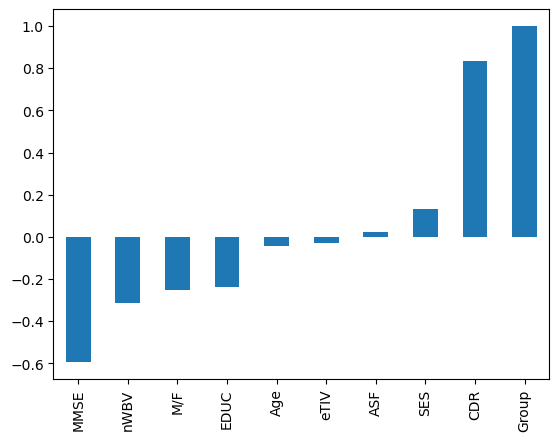

In [140]:
dataframe.corr()['Group'].sort_values().plot(kind="bar")

Text(0, 0.5, 'Sayı')

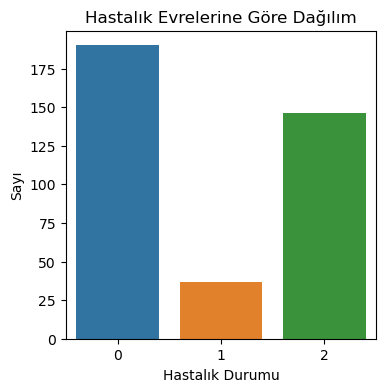

In [141]:
plt.figure(figsize=(4,4))
sbn.countplot(data=dataframe, x='Group')
plt.title('Hastalık Evrelerine Göre Dağılım')
plt.xlabel('Hastalık Durumu')
plt.ylabel('Sayı')

Text(0.5, 1.0, 'Cinsiyet Dağılımı')

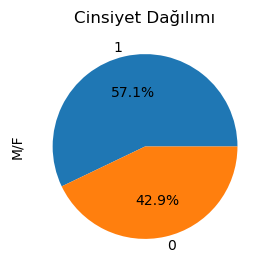

In [142]:
plt.figure(figsize=(3,3))
dataframe['M/F'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Cinsiyet Dağılımı')

Text(0, 0.5, 'SES Skoru')

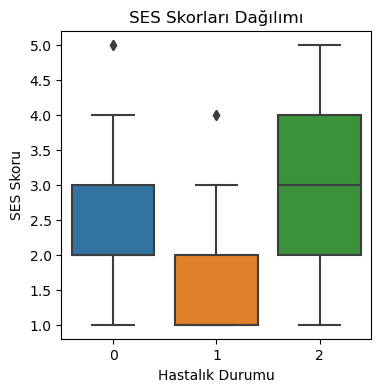

In [143]:
plt.figure(figsize=(4,4))
sbn.boxplot(data=dataframe, x='Group', y='SES')
plt.title('SES Skorları Dağılımı')
plt.xlabel('Hastalık Durumu')
plt.ylabel('SES Skoru')

<Axes: xlabel='Age', ylabel='Count'>

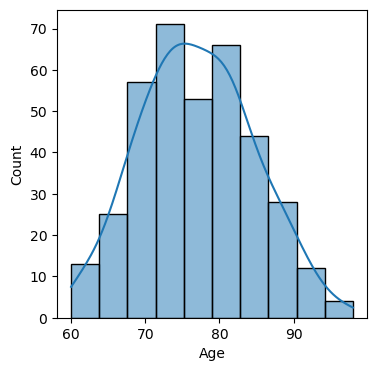

In [144]:
plt.figure(figsize=(4,4))
sbn.histplot(data=dataframe, x='Age', bins=10, kde=True)

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
sc=StandardScaler()

In [148]:
X_train=sc.fit_transform(x_train)

In [149]:
x_test=sc.transform(x_test)

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [151]:
model = Sequential()

model.add(Dense(64, activation = "relu",input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation = "relu"))
model.add(Dense(8 ,activation  = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam",loss ="mse", metrics=['mae'])

In [152]:
model.fit(x = x_train, y =y_train, epochs = 300,validation_data = (x_test,y_test),batch_size=32)

Epoch 1/300
8/8 [==============================] - 1s 26ms/step - loss: 4250.4805 - mae: 56.7474 - val_loss: 1.9320 - val_mae: 1.0805
Epoch 2/300
8/8 [==============================] - 0s 7ms/step - loss: 89.3440 - mae: 8.1930 - val_loss: 1.8562 - val_mae: 1.0393
Epoch 3/300
8/8 [==============================] - 0s 8ms/step - loss: 41.1618 - mae: 6.2838 - val_loss: 1.8066 - val_mae: 1.0137
Epoch 4/300
8/8 [==============================] - 0s 8ms/step - loss: 14.0904 - mae: 3.5147 - val_loss: 1.7708 - val_mae: 0.9953
Epoch 5/300
8/8 [==============================] - 0s 8ms/step - loss: 3.4899 - mae: 1.5352 - val_loss: 1.7531 - val_mae: 0.9865
Epoch 6/300
8/8 [==============================] - 0s 8ms/step - loss: 2.0828 - mae: 1.1850 - val_loss: 1.7545 - val_mae: 0.9878
Epoch 7/300
8/8 [==============================] - 0s 7ms/step - loss: 1.7717 - mae: 0.9843 - val_loss: 1.7512 - val_mae: 0.9862
Epoch 8/300
8/8 [==============================] - 0s 8ms/step - loss: 1.1705 - mae: 1.00

Epoch 64/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9725 - mae: 0.9293 - val_loss: 1.7476 - val_mae: 0.9868
Epoch 65/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9658 - mae: 0.9327 - val_loss: 1.7478 - val_mae: 0.9870
Epoch 66/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9694 - mae: 0.9376 - val_loss: 1.7481 - val_mae: 0.9872
Epoch 67/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9641 - mae: 0.9288 - val_loss: 1.7476 - val_mae: 0.9870
Epoch 68/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9657 - mae: 0.9322 - val_loss: 1.7478 - val_mae: 0.9871
Epoch 69/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9762 - mae: 0.9295 - val_loss: 1.7476 - val_mae: 0.9871
Epoch 70/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9546 - mae: 0.9310 - val_loss: 1.7479 - val_mae: 0.9873
Epoch 71/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9535 - mae: 0.92

Epoch 127/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9544 - mae: 0.9167 - val_loss: 1.7435 - val_mae: 0.9892
Epoch 128/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9689 - mae: 0.9289 - val_loss: 1.7442 - val_mae: 0.9896
Epoch 129/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9289 - mae: 0.9163 - val_loss: 1.7442 - val_mae: 0.9898
Epoch 130/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9266 - mae: 0.9058 - val_loss: 1.7435 - val_mae: 0.9894
Epoch 131/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9710 - mae: 0.9332 - val_loss: 1.7439 - val_mae: 0.9898
Epoch 132/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9425 - mae: 0.9266 - val_loss: 1.7439 - val_mae: 0.9899
Epoch 133/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9292 - mae: 0.9071 - val_loss: 1.7437 - val_mae: 0.9898
Epoch 134/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9463 - m

8/8 [==============================] - 0s 8ms/step - loss: 0.8941 - mae: 0.8969 - val_loss: 1.7355 - val_mae: 0.9911
Epoch 190/300
8/8 [==============================] - 0s 7ms/step - loss: 0.8977 - mae: 0.8992 - val_loss: 1.7353 - val_mae: 0.9912
Epoch 191/300
8/8 [==============================] - 0s 7ms/step - loss: 0.8840 - mae: 0.8910 - val_loss: 1.7352 - val_mae: 0.9912
Epoch 192/300
8/8 [==============================] - 0s 7ms/step - loss: 0.8888 - mae: 0.8933 - val_loss: 1.7352 - val_mae: 0.9913
Epoch 193/300
8/8 [==============================] - 0s 9ms/step - loss: 0.8861 - mae: 0.8883 - val_loss: 1.7343 - val_mae: 0.9910
Epoch 194/300
8/8 [==============================] - 0s 10ms/step - loss: 0.8919 - mae: 0.8976 - val_loss: 1.7349 - val_mae: 0.9914
Epoch 195/300
8/8 [==============================] - 0s 11ms/step - loss: 0.9137 - mae: 0.9015 - val_loss: 1.7336 - val_mae: 0.9909
Epoch 196/300
8/8 [==============================] - 0s 12ms/step - loss: 0.8787 - mae: 0.8852 

8/8 [==============================] - 0s 7ms/step - loss: 0.9209 - mae: 0.8885 - val_loss: 1.7155 - val_mae: 0.9908
Epoch 252/300
8/8 [==============================] - 0s 7ms/step - loss: 0.8673 - mae: 0.8485 - val_loss: 1.7122 - val_mae: 0.9895
Epoch 253/300
8/8 [==============================] - 0s 7ms/step - loss: 1.0379 - mae: 0.9258 - val_loss: 1.7127 - val_mae: 0.9899
Epoch 254/300
8/8 [==============================] - 0s 8ms/step - loss: 0.8897 - mae: 0.8881 - val_loss: 1.7142 - val_mae: 0.9908
Epoch 255/300
8/8 [==============================] - 0s 7ms/step - loss: 0.9018 - mae: 0.8745 - val_loss: 1.7118 - val_mae: 0.9899
Epoch 256/300
8/8 [==============================] - 0s 8ms/step - loss: 0.9217 - mae: 0.8820 - val_loss: 1.7122 - val_mae: 0.9903
Epoch 257/300
8/8 [==============================] - 0s 8ms/step - loss: 0.8984 - mae: 0.8867 - val_loss: 1.7136 - val_mae: 0.9911
Epoch 258/300
8/8 [==============================] - 0s 8ms/step - loss: 0.8986 - mae: 0.8579 - v

In [153]:
loss, mae = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 1.6967 - mae: 0.9939


In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
regressor=LinearRegression()

In [156]:
regressor.fit(x_train,y_train)#öğren 

LinearRegression()

In [157]:
y_pred=regressor.predict(x_test)

C:\Users\bilge\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [158]:
hastalik=dataframe.iloc[:,0:1].values

In [159]:
gerikalan=dataframe.iloc[:,1:]

In [160]:
x_train,x_test,y_train,y_test=train_test_split(gerikalan,hastalik,test_size=0.33,random_state=0)

In [161]:
r2=LinearRegression()

In [162]:
r2.fit(x_train,y_train)#öğren 

LinearRegression()

In [163]:
y_pred=r2.predict(x_test)

In [164]:
import statsmodels.api as sm

In [165]:
X=np.append(arr=np.ones((373,1)).astype(int),values=gerikalan,axis=1)

In [166]:
x_l=gerikalan.iloc[:,[0,1,2,3,4,6,7,8]].values

In [167]:
x_l=np.array(x_l,dtype=float)

In [168]:
model=sm.OLS(hastalik,x_l).fit()

In [169]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.696
Model:                            OLS   Adj. R-squared (uncentered):              0.689
Method:                 Least Squares   F-statistic:                              104.5
Date:                Sat, 14 Oct 2023   Prob (F-statistic):                    1.40e-89
Time:                        10:11:43   Log-Likelihood:                         -402.19
No. Observations:                 373   AIC:                                      820.4
Df Residuals:                     365   BIC:                                      851.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4600      0.096     -4.801      0.000      -0.648      -0.272
x2            -0.0106      0.006     -1.751      0.081      -0.023       0.001
x3            -0.0635      0.019     -3.370      0.001      -0.101      -0.026
x4            -0.0789      0.049     -1.619      0.106      -0.175       0.017
x5            -0.1224      0.012    -10.546      0.000      -0.145      -0.100
x6             0.0026      0.000      5.934      0.000       0.002       0.003
x7            -3.8871      1.349     -2.881      0.004      -6.540      -1.234
x8             4.5429      0.561      8.094      0.000       3.439       5.647
==============================================================================
Omnibus:                       30.836   Durbin-Watson:                   1.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.184
Skew:                           0.338   Prob(JB):                     0.000306
Kurtosis:                       2.236   Cond. No.                     5.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,mean_absolute_error 

In [171]:
r_2 = r2_score(y_test, y_pred)

In [172]:
r_2*100

70.56993770283157

In [173]:
mse = mean_squared_error(y_test, y_pred)

In [174]:
mse

0.25500567116621686

In [175]:
mae = mean_absolute_error(y_test, y_pred)

In [176]:
mae

0.4195249940135934

In [177]:
rmse = np.sqrt(mse)

In [178]:
rmse

0.5049808621781788